In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [30]:
train_data = pd.read_csv('Train.csv')
print("shape of train_data =", train_data.shape)

shape of train_data = (42000, 785)


In [4]:
#We separate these into X (pixel values) and y (labels).
#X has 42,000 samples with 784 features (28x28 pixels) and y has 42,000 labels.

In [15]:
X = train_data.iloc[:,1:] #pixel values
Y = train_data.iloc[:,0]  #labels

In [16]:
print("Shape of x after seperating features:", X.shape)

Shape of x after seperating features: (26391, 784)


In [17]:
#preprocess the data
# we convert all pixel values to numeric format and replace any missing values with 0.
#Next we normalize the pixel values to the range [0, 1] by dividing them by 255.0. This helps the model learn faster.
#Finally we reshape the data to include a channel dimension making it compatible with neural networks.

In [19]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape( -1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)


Shape of X after reshaping: (26391, 28, 28, 1)


In [20]:
#One-Hot Encode the Labels

In [25]:
Y = to_categorical(Y, num_classes=10)
print("Shape of y after on-hot encoding:", Y.shape)


Shape of y after on-hot encoding: (26391, 10)


In [26]:
#Split the Data
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size = 0.2, random_state=42)
print("X_train shape :", X_train.shape)


X_train shape : (21112, 28, 28, 1)


In [27]:
#building the neural network
#a simple feedforward neural network with three layers:

#A Flatten layer converts the 28x28 image into a single vector of length 784.
#Two hidden layers with 128 and 64 neurons use the ReLU activation function to introduce non-linearity.
#An output layer with 10 neurons uses the softmax activation function to predict probabilities for each digit (0-9).
#We compile the model with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.#

In [29]:
model = Sequential([
    Flatten(input_shape = (28,28,1)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#train the model

In [33]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4428 - loss: 1.8207 - val_accuracy: 0.7725 - val_loss: 0.7586
Epoch 2/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7938 - loss: 0.6794 - val_accuracy: 0.8354 - val_loss: 0.5654
Epoch 3/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8501 - loss: 0.5229 - val_accuracy: 0.8619 - val_loss: 0.4783
Epoch 4/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8790 - loss: 0.4276 - val_accuracy: 0.8748 - val_loss: 0.4277
Epoch 5/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8874 - loss: 0.3960 - val_accuracy: 0.8769 - val_loss: 0.4110
Epoch 6/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8948 - loss: 0.3695 - val_accuracy: 0.8909 - val_loss: 0.3752
Epoch 7/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9045 - loss: 0.3386 - val_accuracy: 0.8924 - val_loss: 0.3664
Epoch 8/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9063 - loss: 0.3278 - val_accuracy: 0.

In [34]:
#Evaluate the Model

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9114 - loss: 0.3286
Validation Accuracy: 90.41%


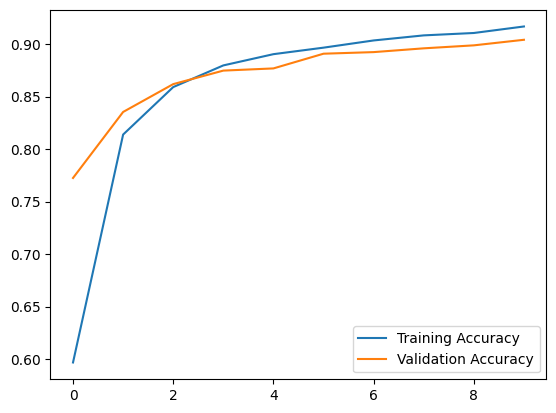

In [36]:
val_loss, val_accuracy = model.evaluate(X_val, Y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [37]:
#make predictions

In [39]:
test_data = pd.read_csv('test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [40]:
#using opencv

In [41]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [42]:
#load datasets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [43]:
#preprocess the images
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [44]:
#reshape the images
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


In [45]:
#one hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [50]:
#building the model
model = Sequential ([
                    Flatten(input_shape = (28,28,1)),
                    Dense(128, activation='relu'),
                    Dense(10,activation='softmax')

                    ])
#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [51]:
#train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8534 - loss: 0.5097 - val_accuracy: 0.9527 - val_loss: 0.1646
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9599 - loss: 0.1407 - val_accuracy: 0.9666 - val_loss: 0.1128
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9721 - loss: 0.0958 - val_accuracy: 0.9709 - val_loss: 0.0939
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9801 - loss: 0.0700 - val_accuracy: 0.9737 - val_loss: 0.0841
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9837 - loss: 0.0547 - val_accuracy: 0.9758 - val_loss: 0.0800


In [53]:
image = cv2.imread('digit.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,(28,28))
image = image.astype('float32')/255
image = np.expand_dims(image,axis = 0)
image = np.expand_dims(image,axis =-1)

#predict the digit
prediction = np.argmax(model.predict(image))

print("Predicted Digit:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Digit: 9
